# Brownian Motion

Brownian motion is usually used to refer to the random jiggling of pollen grains in water. However, any molecule inside water undergoes this jiggling as a result of random bombardments by other molecules but due to color differences this is noticable only for pollen grains. In this section we use stochastic calculus to model Brownian motion. We do this by attributing the change in the velocity to a drag force opposed to the velocity and a random force modelled by the Wiener process. This system is analytically solvable and we do so. We then integrate the velocity to find the position of the particle. At late times the position displays the classic $x_t \sim \sqrt{t}$ behavior of random walk. We then proceed to solve the system by Monte Carlo and demonstrate that this is consistent with the analytical method.

I have chosen to keep the steps in the derivations explicit for eager students to be able to reproduce. However, for those interested only in the final results and to assist the reader in not getting lost in the details, I have color coded the essential equations and results.

## Velocity

The change in velocity process involves a deterministic drag piece and a stochastic force piece modelled by the Wiener process. In a different reincarnation (devoid of Stochastic calculus notation) this is known as the [Langevin equation](https://en.wikipedia.org/wiki/Langevin_equation). The process is described by the SDE

$$ 
\newcommand{\mean}[1]{\langle #1 \rangle}
\newcommand{\f}[2]{\frac{#1}{#2}}
\color{red}{dV(t) = - \gamma V(t) dt + \beta dW_t}~.$$

Using standard techniques this can be solved to give

$$ V(t)  = v_0 e^{-\gamma t} + \beta e^{-\gamma t} \int_0^t e^{\gamma t'} dW_{t'}$$ 

as can be verified by direct substitution. 

However this form is not particularly illuminating. Instead we observe that at every instant we add an independent normally distributed increment to the velocity and thus, by the stability of normal distribution under convolution, the velocity at any time will be given by a normal distribution. Since the normal distribution is completely determinded by its first two moments, we only need to evaluate those. Since the notation of differential element in Stochastic calculus is different from that in deterministic calculus, I will be very explicit in the following. We begin by being very clear what the above SDE means. It means

$$ \begin{eqnarray}
dV(t):= V(t+dt) - V(t)
\end{eqnarray}
$$

where $V(t)$ and $V(t+dt)$ are stochastic variables (and in particular are normally distributed as we established above). We can take the expectation value on both sides to get

$$ \begin{eqnarray}
\mean{ d V(t)} &=& \mean{V(t+dt)} - \mean{V(t)} := d \mean{V(t)} \\
&=& -\gamma \mean{V(t)}
\end{eqnarray}
$$


Notice how in the first line the 'd' came out of the mean. This needs to be clearly understood as it is a potential source of confusion. In fact, if one wants to be careful one should use different symbols for stochastic differential elements and ordinary ones. The 'd' on the RHS of the first line is the usual differential element from ordinary deterministic calculus and we then have an ODE for the mean

$$ \begin{eqnarray}
d \mean{V(t)} &=& - \gamma \mean{V(t)} dt~,
\end{eqnarray}
$$

with the solution

$$ \mean{V(t)} = v_0 e^{-\gamma t} ~.$$

Now we look for the variance. We use similar techniques as above to get

$$
\begin{eqnarray}
d(V^2)(t) &:=& V(t+dt)^2 - V(t)^2~,\\
&=& d 2 V(t) dV(t) + {dV(t)}^2 ~, \\
&=& (-2 \gamma V^2(t) + \beta^2) dt + 2 V(t) \beta dW_t ~.
\end{eqnarray}
$$

which can also be viewed as an application of Ito's rule. Taking the mean of both sides

$$\begin{eqnarray}
\mean{d V^2(t)} &=& \mean{V(t+dt)^2} - \mean{V(t)^2} := d \mean{V^2(t)} \\
&=& (\beta^2-2 \gamma \mean{V^2(t)}) dt ~.
\end{eqnarray}
$$

which gives us an ODE. The solution to this ODE consistent with the initial condition $V(0)=v_0$ is

$$
\mean{V^2(t)}= v_0^2 e^{-2 \gamma t} +  \f{\beta^2}{2 \gamma} (1- e^{-2 \gamma t}) ~.
$$

Therefore we get

$$
var(V(t))=\f{\beta^2}{2 \gamma} (1- e^{-2 \gamma t})~.
$$

This finally gives

$$
\color{blue}{V(t) = \mathcal N \Big( v_0 e^{-\gamma t}, \sqrt{ \f{\beta^2}{2 \gamma} (1- e^{-2 \gamma t})}\Big)}
$$


** Interpretation **

We see that at late times $ t \gamma \gg 1$, we get $V(t) = \mathcal N \Big( 0, \f{\beta}{\sqrt{2 \gamma}}\Big)$. Thus the mean velocity goes to zero but there are fluctuations. In the context of physics these fluctuations have to be such that the average energy is $\f{1}{2} k T$ where $k$ is the Boltzmann constant and $T$ is the tempreature. Thus we get
$$
\f{1}{2} M \f{\beta^2}{2 \gamma} = \f{1}{2} k T~,
$$
giving 
$$
\beta =\sqrt{\f{2 \gamma k T}{M}}~.
$$

In other words the strength of the stochastic kicks on the particle is phenominologically fixed from the drag force, the temperature and the mass of the particle to be consistent with the equipartition of energy (which basically comes from the second law of thermodynamics which in turn is a fancy way of saying that the system is typically found to be in a state that is most likely).

## Position

The SDE for position is given by

$$
\color{red}{dX(t)= V(t) dt}~,
$$
and using Ito's rule we get
$$
\begin{eqnarray}
dX^2(t)&=&2 X(t) dX(t) + d X(t)^2~, \\
&=& 2 X(t) V(t) dt~,
\end{eqnarray}
$$
and
$$
\begin{eqnarray}
d(XV(t)) &=& V(t) dX(t) + X(t) dV(t) + dX(t) dV(t) ~,\\
&=& (V^2(t) - X(t) V(t))dt + \beta X(t) dW_t~.
\end{eqnarray}
$$

Taking the expectation values of these we get the ODEs
$$ 
\begin{eqnarray}
d\mean{X(t)} &=& \mean{V(t)} dt = v_0 e^{-\gamma t} ~,\\
d\mean{X^2(t)} &=& 2 \mean{X(t) V(t)} dt ~,  \\
d \mean{XV(t)} &=& - \gamma \mean{XV(t)} dt + \mean{V^2(t)} dt ~.
\end{eqnarray}
$$
The first can be solved to give
$$
\mean{X(t)} = x_0 + \f{v_0}{\gamma} (1- e^{-\gamma t})~.
$$
We massage the others to get
$$
\begin{eqnarray}
\f{d var(X(t))}{dt} &=&  \f{d \mean{X^2(t)}}{dt}  - 2 \mean{X(t)} \f{d \mean{X(t)}}{dt}~, \\
&=& 2 cov(X(t), V(t))~.
\end{eqnarray}$$
and
$$
\begin{eqnarray}
\f{d cov(X(t),V(t))}{dt} &=&  \f{d \mean{X(t) V(t)}}{dt}  -  \mean{X(t)} \f{d \mean{V(t)}}{dt}-\mean{V(t)} \f{d \mean{X(t)}}{dt} ~,\\
&=& \mean{V^2(t)} - \gamma \mean{X(t) V(t)}+ \gamma \mean{X(t)} \mean{V(t)} -\mean{V(t)}^2 ~, \\
&=& var(V(t)) - \gamma cov(X(t),V(t))~.
\end{eqnarray}$$

Therefore we get
$$
cov(X(t) V(t)) = \f{\beta^2}{2 \gamma^2}(1- 2 e^{-\gamma t}+ e^{-2 \gamma t})~,
$$
and 
$$
var(X(t)) = \f{\beta^2}{\gamma^2} \left[ t - \f{2}{\gamma}(1- e^{-\gamma t}) + \f{1}{2 \gamma} (1- e^{-2 \gamma t}) \right]~.
$$

Thus collecting all the results
$$
\color{blue}{X(t) =  \mathcal N \Big( x_0 + \f{v_0}{\gamma} (1- e^{-\gamma t}),  \f{\beta}{\gamma} \sqrt{  t - \f{2}{\gamma}(1- e^{-\gamma t}) + \f{1}{2 \gamma} (1- e^{-2 \gamma t})}\Big)}
$$

** Interpretation **

We see that at late times the mean position goes to $x_0 + v_0 \gamma^{-1}$ and the variance is given by $\beta^2 \gamma^{-2} t$. With the interpretation of $\beta$ given above the variance is $\f{2 kT}{\gamma M} t$. We see that the fluctuations are inversely proportional to mass and drag and directly proportional to temperature which makes sense. Also note that early time behavior is different form the linear scaling of variance with time that is a characteristic of random walk.

** Smoluchowski Approximation **

There is a nice way to get the late time behavior directly. We do this by minimizing *inertial* effects and maximing random effect. We do this by setting $dV=0$, solving for $V(t) dt$ and plugging this in $dX= V(t) dt$ to get
$$
dX = \f{\beta}{\gamma} dW_t
$$
that solves to $X(t) = \mathcal N(x_0', \f{\beta}{\gamma} \sqrt{t})$ where $x_0'$ is the value of $X(t)$ when the Smouluchowski approximation kicks in.

## Plots of Analytical Expressions

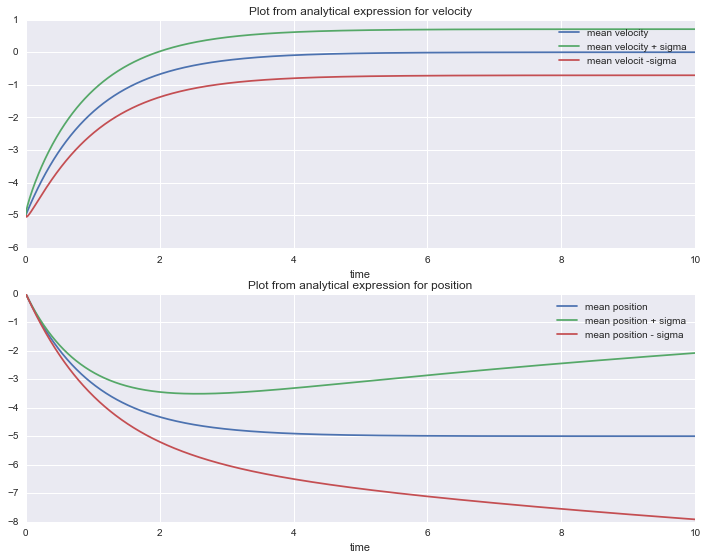

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(12, 9)


# Parameters
beta=1.0
gamma=1.0

# Initial values
v0=-5.0
x0=0.0

t=np.linspace(0,10,1000)
std_vel=np.sqrt((beta**2/(2 * gamma))* (1- np.exp(-2*gamma*t)))
std_pos=np.sqrt((beta/gamma)**2*(t-2/gamma*(1-np.exp(-gamma*t))+1/(2*gamma)*(1-np.exp(-2*gamma*t))))



vmean=v0*np.exp(-gamma*t)
vup=vmean+std_vel
vdown=vmean-std_vel
plt.subplot(211)
plt.plot(t,vmean,label="mean velocity")
plt.plot(t,vup,label="mean velocity + sigma")
plt.plot(t,vdown,label="mean velocit -sigma")
plt.xlabel("time")
plt.title("Plot from analytical expression for velocity")


plt.legend()


plt.subplot(212)
xmean=x0+v0/gamma*(1- np.exp(-gamma*t))
xup=xmean+std_pos
xdown=xmean-std_pos
plt.plot(t,xmean,label="mean position")
plt.plot(t,xup,label="mean position + sigma")
plt.plot(t,xdown,label="mean position - sigma")
plt.xlabel("time")
plt.title("Plot from analytical expression for position")


plt.legend()


## Monte Carlo Simulations

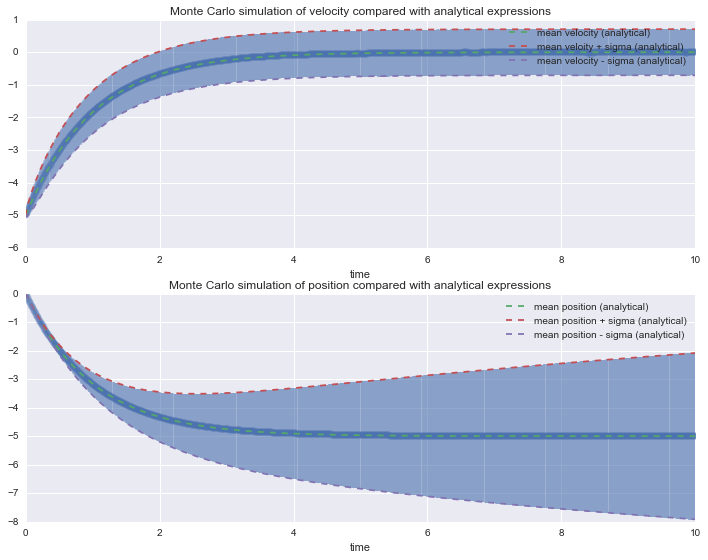

In [2]:
####################################

# Since this is a genuine physics problem with velocity and position (in other words inertia does play role in addition to randomness)
# the stochastics of both need to be taken into account. Thus the class Path is necessarily different from that in later
# chapters. It may be useful to rename.

##################################
class Paths(object):
    
    def __init__(self,x0,v0,beta,gamma,T,nsteps,npaths):
        self.x0=x0
        self.v0=v0
        self.beta=beta
        self.gamma=gamma
        self.T=T
        self.nsteps=nsteps
        self.npaths=npaths
        self.dt=1.0*T/nsteps
        self.time=np.linspace(0,self.T,self.nsteps)
        self.dW=np.sqrt(self.dt)
        self.randoms=np.random.normal(0,1,npaths*(nsteps-1))
        self.randoms.shape=[npaths,nsteps-1]
        
        
        
        paths_X=np.zeros(shape=(npaths,nsteps))
        paths_V=np.zeros(shape=(npaths,nsteps))
        
        paths_X[:,0]=self.x0
        paths_V[:,0]=self.v0
    
        # the SDE are
        # V_{t+1}=V_t - gamma V_t dt + beta dW
        # X_{t+1}=X_t + V_t dt
        
        for i in range(nsteps-1):
            paths_V[:,i+1]=paths_V[:,i]*(1.0-gamma*self.dt)+self.beta*self.dW*self.randoms[:,i]
            paths_X[:,i+1]=paths_X[:,i]+paths_V[:,i]*self.dt
        self.paths_V=paths_V
        self.paths_X=paths_X
        
    def get_paths_V(self):
        return self.paths_V
    
    def get_paths_X(self):
        return self.paths_X
    
    def get_timeline(self):
        return self.time
    

paths=Paths(x0,v0,beta,gamma,10,1000,10000)
v_mean=paths.get_paths_V().mean(0)
v_std=paths.get_paths_V().std(0)

x_mean=paths.get_paths_X().mean(0)
x_std=paths.get_paths_X().std(0)

t_paths=paths.get_timeline()

plt.subplot(211)
plt.errorbar(t_paths,v_mean,yerr=v_std,fmt='o',alpha=.3)
plt.plot(t,vmean,"--",label="mean velocity (analytical)")
plt.plot(t,vup,"--",label="mean veloity + sigma (analytical)")
plt.plot(t,vdown,"--",label="mean velocity - sigma (analytical)")
plt.xlabel("time")
plt.title("Monte Carlo simulation of velocity compared with analytical expressions")

plt.legend()

plt.subplot(212)
plt.errorbar(t_paths,x_mean,yerr=x_std,fmt='o',alpha=.3)
plt.plot(t,xmean,"--",label="mean position (analytical)")
plt.plot(t,xup,"--",label="mean position + sigma (analytical)")
plt.plot(t,xdown,"--",label="mean position - sigma (analytical)")
plt.xlabel("time")
plt.title("Monte Carlo simulation of position compared with analytical expressions")


plt.legend()




** A realization of the path is given below **

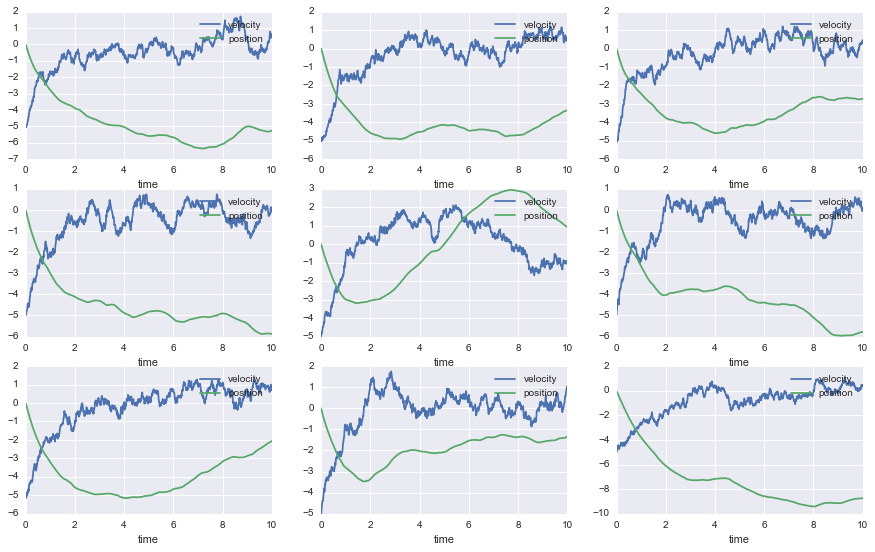

In [4]:
figsize(15,9)
number_columns=3
number_rows=3
for i,j in enumerate([(i/number_columns,i%number_columns) for i in range(number_columns*number_rows)]):
    plt.subplot2grid((number_rows,number_columns),j)
    plt.plot(t_paths,paths.get_paths_V()[i],label="velocity")
    plt.plot(t_paths,paths.get_paths_X()[i],label="position")
    plt.xlabel("time")
    plt.legend()
